In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
DATA = "../data/"

In [3]:
test_df = pd.read_csv(DATA + "test_df.csv", index_col=0).fillna(" ")
train_df = pd.read_csv(DATA + "train_df.csv", index_col=0).fillna(" ")

In [4]:
train_df["condition"].value_counts()

test_w      4000
test_baa    4000
test_hl     4000
control     3999
Name: condition, dtype: int64

In [7]:
# This is a function to output descriptive data in csv format. It takes a single variable and outputs n, mean, and sd
variable_list = [
    "task",
    "gender",
    "grade",
    "ell",
    "race_ethnicity",
    "economically_disadvantaged",
    "student_disability_status",
]


def descriptive(df, metavariable):
    variables = pd.Series(df[metavariable].unique()).dropna()
    for variable in variables:
        var_list = []
        average = df[df[metavariable] == variable]["holistic_score_adjudicated"]
        print(
            str(variable)
            + ","
            + str(len(average))
            + ","
            + str(round(average.mean(), 2))
            + ","
            + str(round(average.std(), 2))
        )
    print(
        "total"
        + ","
        + str(len(df))
        + ","
        + str(round(df["holistic_score_adjudicated"].mean(), 2))
        + ","
        + str(round(df["holistic_score_adjudicated"].std(), 2))
    )


for i in variable_list:
    descriptive(train_df[train_df["condition"] == "control"], i)

Text dependent,2056,2.82,1.03
Independent,1943,3.59,1.09
total,3999,3.19,1.13
F,2049,3.31,1.12
M,1950,3.07,1.12
total,3999,3.19,1.13
10,1410,2.96,1.07
8,1361,3.13,0.99
11,496,4.42,0.91
9,338,2.96,1.11
12,186,3.58,0.91
6,208,2.34,0.75
total,3999,3.19,1.13
No,3305,3.22,1.13
 ,267,3.74,0.9
Yes,427,2.68,0.98
total,3999,3.19,1.13
White,1333,3.44,1.14
Black/African American,1333,3.1,1.1
Hispanic/Latino,1333,3.04,1.09
total,3999,3.19,1.13
 ,923,3.22,1.09
Economically disadvantaged,1671,2.89,1.02
Not economically disadvantaged,1405,3.53,1.17
total,3999,3.19,1.13
Not identified as having disability,3207,3.22,1.12
Identified as having disability,547,2.75,1.13
 ,245,3.82,0.85
total,3999,3.19,1.13


In [7]:
test_df["word_count"] = test_df["full_text"].apply(lambda x: len(x.split()))
train_df["word_count"] = train_df["full_text"].apply(lambda x: len(x.split()))

In [10]:
def word_counts(df):
    mean = str(round(df["word_count"].mean(), 2))
    sd = str(round(df["word_count"].std(), 2))
    mini = str(round(df["word_count"].min(), 2))
    maxi = str(round(df["word_count"].max(), 2))
    print(mean + "," + sd + "," + mini + "," + maxi)

In [11]:
word_counts(test_df)

427.6,199.61,143,1656


Text(0.5, 1.0, 'Average Scores of the Four Training Sets')

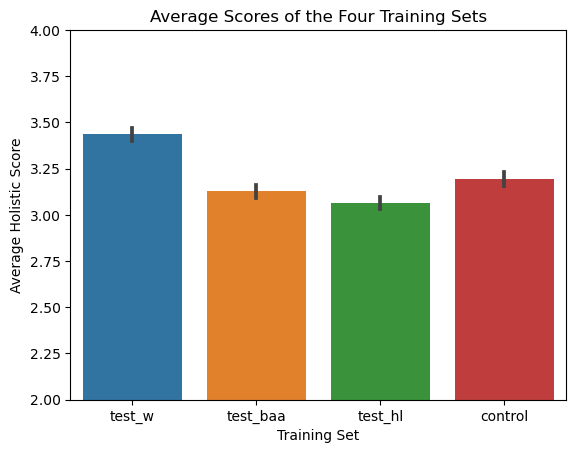

In [23]:
g = sns.barplot(data=train_df, x="condition", y="holistic_score_adjudicated")
g.set(ylim=(2, 4))
plt.ylabel("Average Holistic Score")
plt.xlabel("Training Set")
plt.title("Average Scores of the Four Training Sets")

In [16]:
for i in train_df["condition"].drop_duplicates():
    print(i)
    print(word_counts(train_df[train_df["condition"] == i]))

test_w
420.29,185.7,150,1235
None
test_baa
385.88,180.21,152,1650
None
test_hl
387.1,177.65,151,1430
None
control
399.28,180.78,151,1650
None


In [24]:
train_df["holistic_score_adjudicated"].max()

6